# **Modelling and Evaluation V2**

## Objectives

* Answer business requirement 1:
    * The client aims to create a machine learning model that can visually differentiate a benign skin lesion from a malignant one using the lesion images. The model should be capable of reaching an accuracy of at least 90%.
<br><br>

* Answer business requirement 2:
    - The model should provide a confidence level for each prediction.
<br><br>

* Answer business requirement 3:
    - If a skin lesion is predicted as malignant with high confidence, the system should recommend immediate medical consultation. The precision of these recommendations should be over 85%.
<br><br>

* Answer business requirement 6:
    - The AI model's insights should assist healthcare professionals in making informed decisions about the treatment process.
<br><br>

* Answer business requirement 7:
    - The model's performance will be evaluated using balanced performance metrics such as F1 Score and AUC-ROC, aiming for scores above 0.85 and 0.9, respectively.
<br><br>
## Inputs

* inputs/skin_cancer_dataset/sorted_images/train
* inputs/skin_cancer_dataset/sorted_images/test
* inputs/skin_cancer_dataset/sorted_images/validation
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Additional Comments

* V2 - Upsampling and downsampling used to handle the imbalance in the dataset
<br><br>

### Upsampling
#### Positives:
* Information Retention: Upsampling retains all information from the original dataset since it focuses on increasing the number of instances in the minority class.
* Improved Performance on Minority nv Class: By creating more instances of the minority class nv, the model may better learn the characteristics of the minority classes, leading to improved performance.
* Reduced Bias: It reduces the bias towards the majority nv class, as the class distribution becomes more balanced.

#### Negatives:
* Overfitting: By replicating instances or creating synthetic instances in the minority classes, the model might learn noise or overfit to the minority classes.
* Increased Computation: With an increase in the number of instances through upsampling, the computational complexity and training time may increase.

### Downsampling
#### Positives:
* Reduced Computation: Downsampling reduces the number of instances in the dataset, and this can lead to faster training times and lower computational costs.
* Balanced Class Distribution: By reducing the instances in the majority nv class, the class distribution becomes more balanced which can lead to reduced bias toward the nv class.

#### Negatives:
* Information Loss: Reducing the number of instances in the majority class nv may result in the loss of potentially important information.
* Underfitting: With fewer data points to learn from, the model might not capture the underlying complexity of the data and could underfit.
* Decreased Performance on Majority Class: As the majority class nv has fewer examples after downsampling, the model might perform worse on this class due to limited information.

---

---

# Import regular packages

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib

---

# Change working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis'

---

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/skin_cancer_dataset/sorted_images'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'modelling_evaluation_v2'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set label names

In [7]:
# Set the labels
train_labels = os.listdir(train_path)
print('Label for train set the images are', train_labels, 'there are', len(train_labels) )
test_labels = os.listdir(test_path)
print('Label for test set the images are', test_labels, 'there are', len(test_labels) )
val_labels = os.listdir(val_path)
print('Label for val set the images are', val_labels, 'there are', len(val_labels) )

Label for train set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for test set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for val set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7


## Set image shape

In [10]:
image_shape = (225, 300, 3)
image_shape

(225, 300, 3)

In [12]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/modelling_evaluation_v2/image_shape.pkl']

In [13]:
## Import saved image shape embedding
import joblib
image_shape = joblib.load(filename=f"{file_path}/image_shape.pkl")
image_shape

(225, 300, 3)

---

# Number of images in train, test and validation data

* train - akiec: 228 images
* train - df: 80 images
* train - bkl: 769 images
* train - vasc: 99 images
* train - nv: 4693 images
* train - bcc: 359 images
* train - mel: 779 images
* validation - akiec: 32 images
* validation - df: 11 images
* validation - bkl: 109 images
* validation - vasc: 14 images
* validation - nv: 670 images
* validation - bcc: 51 images
* validation - mel: 111 images
* test - akiec: 67 images
* test - df: 24 images
* test - bkl: 221 images
* test - vasc: 29 images
* test - nv: 1342 images
* test - bcc: 104 images
* test - mel: 223 images




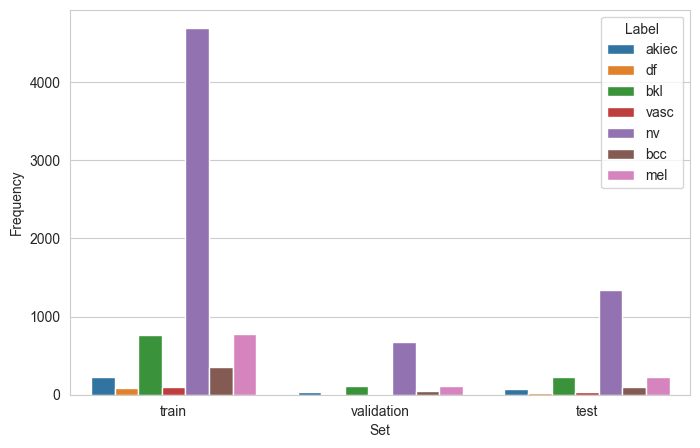

In [14]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in train_labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## Build training set

In [15]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Get the list of all classes (subdirectories in your train directory)
classes = os.listdir(train_path)

# Initialize the list that will contain all images
X_train = []

# Initialize the list that will contain all labels
y_train = []

# For each class (subdirectory) in your train directory
for class_name in classes:
    # Get the list of all images in this subdirectory
    images = os.listdir(os.path.join(train_path, class_name))
    
    # For each image
    for image_name in images:
        # Construct the full path to the image
        image_path = os.path.join(train_path, class_name, image_name)
        
        # Read the image and resize it to some fixed size (e.g., 150x150)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (150, 150))
        
        # Add this image to the list of all images
        X_train.append(image)
        
        # Add the label (class name) of this image to the list of all labels
        y_train.append(class_name)

# Convert the list of images into a numpy array
X_train = np.array(X_train)

# # Convert the labels into integers
label_encoder = LabelEncoder()
y_train_encode = label_encoder.fit_transform(y_train)

## Upsampling

nv       4693
mel      1575
bkl      1565
bcc       730
akiec     471
vasc      201
df        151
Name: dx, dtype: int64


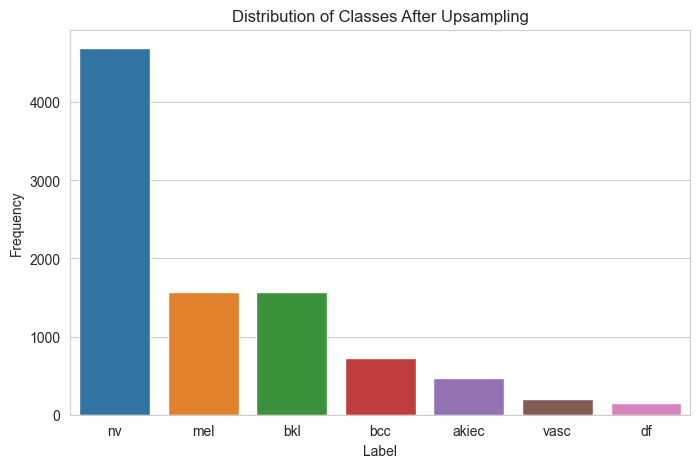

In [18]:
from sklearn.utils import resample

# Now let's create a DataFrame using these names
df_train = pd.DataFrame(y_train, columns=['dx'])

# Then, proceed as before:

# Separate majority and minority classes
df_majority = df_train[df_train.dx=='nv']
df_minority = df_train[df_train.dx!='nv']

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                replace=True,     # Sample with replacement
                                n_samples=len(df_majority),    # To match majority class
                                random_state=123) # Reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Get the indices of upsampled data
upsampled_indices = df_upsampled.index

# Use these indices to select the corresponding images from X_train
X_train_upsampled = X_train[upsampled_indices]

# Display new class counts
print(df_upsampled.dx.value_counts())

# Now let's plot the new distribution
df_freq_upsampled = df_upsampled['dx'].value_counts().reset_index()
df_freq_upsampled.columns = ['Label', 'Frequency']

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq_upsampled, x='Label', y='Frequency')
plt.title('Distribution of Classes After Upsampling')
plt.show()

## Downsampling

nv       2314
mel       779
bkl       769
bcc       359
akiec     228
vasc       99
df         80
Name: dx, dtype: int64


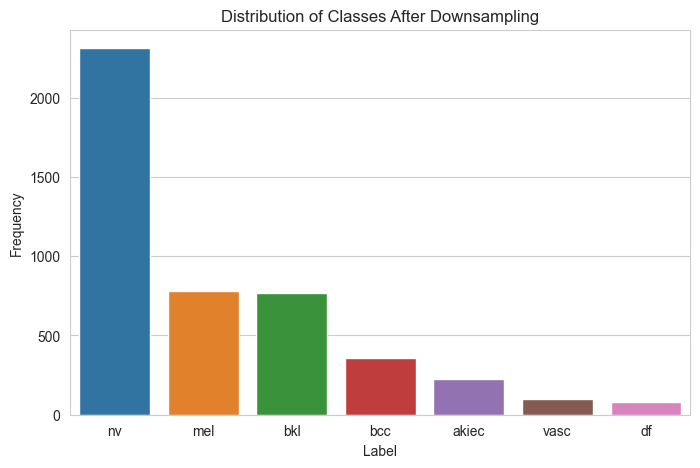

In [20]:
from sklearn.utils import resample

# Now let's create a DataFrame using these names
df_train = pd.DataFrame(y_train, columns=['dx'])

# Separate majority and minority classes
df_majority = df_train[df_train.dx=='nv']
df_minority = df_train[df_train.dx!='nv']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                  replace=False,    # sample without replacement
                                  n_samples=len(df_minority),     # to match minority class
                                  random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Get the indices of downsampled data
downsampled_indices = df_downsampled.index

# Use these indices to select the corresponding images from X_train
X_train_downsampled = X_train[downsampled_indices]

# Display new class counts
print(df_downsampled.dx.value_counts())

# Now let's plot the new distribution
df_freq_downsampled = df_downsampled['dx'].value_counts().reset_index()
df_freq_downsampled.columns = ['Label', 'Frequency']

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq_downsampled, x='Label', y='Frequency')
plt.title('Distribution of Classes After Downsampling')
plt.show()

---

---

NOTE

## Upsampling Comments
* Synthetic Data Repetition: For classes like df with only 151 original instances, creating 4693 instances would mean a lot of repetition or synthetic data creation. The synthetic samples might not represent true underlying variations and could lead to the model learning noise or being overfit to the characteristics of the limited original samples.

* Increased Computational Cost: With the total number of samples being significantly increased, the computational requirements for training models on this data would also rise. This could lead to longer training times and might not be feasible with limited resources.

* Dilution of Informative Features: The majority class nv originally had more examples, probably with more variability and information. Upsampling the minority classes to the same number of instances might cause the model to focus too much on the minority classes. This could lead to the dilution of informative features from the majority class.

## Downsampling Comments
* Loss of Information: Downsampling involves reducing the number of instances in the majority class 'nv'. In this dataset, the class nv has been reduced from 4693 to 2314 instances. This means that a large amount of data and potentially valuable information is lost, which could have contributed to the model's performance.

* Underfitting: With significantly fewer examples to learn from, the model might not capture the complexity and variability of the data well enough. This might lead to underfitting, where the model is too simple to capture the underlying patterns.

* Reduced Representativeness: When downsampling, there is a chance that the samples chosen to represent the classes are not fully representative of the entire population of those classes. This can lead to a model that performs well on the training data but poorly on unseen data, due to lack of generalization.

---